
<h1>Задание 1</h1>

есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   
Необходимо прочитать его и представить в виде df 

In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

2.1.1


In [3]:
df = pd.read_csv("shopping_trends.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


<h1>Задание 2.1</h1>

На основании данных из задания 1 необходимо составить максимальное(миним 5) кол-во гипотез о корреляциях между отдельными столбцами и проверить их (аналогично воршопу). При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покапают в основном осенью")

<h2>Гипотеза 1</h2> <strong>Более молодые клиенты (моложе 40 лет) совершают более высокие покупки, чем старшие клиенты (старше 40 лет).</strong>

In [4]:
young_customers = df[df['Age'] < 40]
old_customers = df[df['Age'] >= 40]

<h3>Корреляция между возрастом и суммой покупки у клиентов, которым меньше 40</h3>

In [5]:
young_customers['Age'].corr(young_customers['Purchase Amount (USD)'])

-0.0038213276705269046

<h3>Корреляция между возрастом и суммой покупки у клиентов, которые старше 40</h3>

In [6]:
old_customers['Age'].corr(old_customers['Purchase Amount (USD)'])

0.00993384083139422

<h3>Вывод по первой гипотезе</h3>

Можно сделать вывод, что на основе линейной корреляции возраст не оказывает значительного влияния на сумму покупки, и связь между этими двумя переменными практически отсутствует.

<h2>Гипотеза 2</h2> <strong>Мужчины и женщины предпочитают разные категории товаров.</strong>

In [7]:
from scipy.stats import chi2_contingency

In [8]:
crossDfGenderCategory = pd.crosstab(df['Gender'],df['Category'])
crossDfGenderCategory

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,392,556,199,101
Male,848,1181,400,223


In [9]:
chi2_cont = chi2_contingency(crossDfGenderCategory)

In [10]:
chi2_cont.pvalue, chi2_cont.statistic

(0.8967937925861853, 0.5984208314833445)

<h3>Вывод по второй гипотезе</h3>

Пол и категория товара в нашем датасете независимы друг от друга и нету статистически значимой связи между ними.

<h2>Гипотеза 3</h2> <strong>Клиенты, использующие скидки, совершают более крупные покупки.</strong>

In [11]:
from scipy.stats import ttest_ind

In [12]:
discountCustomersUSD = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)']
unDiscountCustomersUSD = df[df['Discount Applied'] == 'No']['Purchase Amount (USD)']

In [13]:
ttestResults = ttest_ind(discountCustomersUSD, unDiscountCustomersUSD)
ttestResults.statistic, ttestResults.pvalue

(-1.1113791657829266, 0.2664737200577539)

<h3>Вывод по третьей гипотезе</h3>

Нету доказаетльств того, что клиенты, использующие скидки, совершают более крупные покупки по сравнению с клиентами, не использующими скидки.

<h2>Гипотеза 4</h2> <strong>Клиенты, которые совершили много покупок, ставят более высокий рейтинг.</strong>

In [14]:
corrRR_PP = df['Review Rating'].corr(df['Previous Purchases'])

In [15]:
corrRR_PP

0.0042290994652709095

<h3>Вывод по четвертой гипотезе</h3>

Связь между данными колонками практически отсутствует.

<h2>Гипотеза 5</h2> <strong> Есть различия в предпочтительном методе оплаты между клиентами, использующими разные методы доставки.</strong>

In [16]:
crossDfPPM_ST= pd.crosstab(df['Preferred Payment Method'], df['Shipping Type'])
crossDfPPM_ST

Shipping Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Preferred Payment Method,,,,,,
Bank Transfer,98,91,101,117,93,112
Cash,100,108,121,104,118,119
Credit Card,123,114,107,108,115,104
Debit Card,93,98,117,105,118,105
PayPal,109,129,123,106,107,103
Venmo,104,106,106,108,103,107


In [17]:
chi2_cont = chi2_contingency(crossDfPPM_ST)
chi2_cont.statistic, chi2_cont.pvalue 

(19.00744560152541, 0.7967634034187351)

<h3>Вывод по пятой гипотезе</h3>

Предпочтительный метод оплаты не зависит от метода доставки

<h1>Задание 2.2</h1>

Помимо гипотез, давайте найдем самый популярный товар, построим распределение покупателей по полу, определим какой пол(и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Определим есть ли зависимость между цветом одежды и сезоном. Так же посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику. Так же давайте найдем самую популярную букву в названии одежды. 

<h2>Популярный товар</h2>

In [18]:
mostPopularItem = df['Item Purchased'].value_counts().idxmax()
mostPopularItem

'Blouse'

<h2>Распределение покупателей по полу</h2>

<Axes: title={'center': 'Распределение покупателей по полу'}, xlabel='Gender', ylabel='Count'>

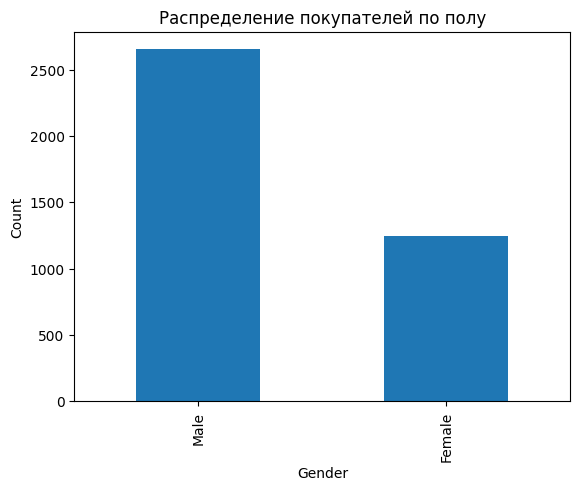

In [19]:
genderDist = df['Gender'].value_counts()
genderDist.plot(kind = 'bar', ylabel = 'Count',title="Распределение покупателей по полу")

<h2>Пол и возраст, покупающий больше всего</h2>

In [20]:
def mostFeature(df:pd.DataFrame, groupby_feature:str, feature:str) -> str:
    most = df.groupby(groupby_feature)[feature].count()
    return f'Maximum value of a {groupby_feature} on {feature} - {most.idxmax()}'

In [21]:
mostPurchasedGender = mostFeature(df,'Gender','Previous Purchases')
mostPurchasedGender

'Maximum value of a Gender on Previous Purchases - Male'

In [22]:
mostPurchasedAge = mostFeature(df,'Age','Previous Purchases')
mostPurchasedAge

'Maximum value of a Age on Previous Purchases - 69'

<h2>Пол и возраст, покупающий чаще всего</h2>

In [23]:
from datetime import date 

In [24]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

Я перевел частоту в число 

In [25]:
def mostFrequencyOfPurchases(feature:str):
    last_week = date(2022, 12, 28).isocalendar().week
    dFrequencyOfPurchases = {
        'Fortnightly':(last_week/2)/last_week,  
        'Weekly': (last_week/1)/last_week,
        'Annually' : 1/last_week,
        'Quarterly' : (last_week/16)/last_week,
        'Bi-Weekly' : (last_week/1.5)/last_week,
        'Monthly' : (last_week/4)/last_week,
        'Every 3 Months' : (last_week/12)/last_week
    }
    
    return df.groupby(feature)['Frequency of Purchases'].agg(
                                                            lambda x: sum(dFrequencyOfPurchases[x] for x in x)/len(x)
                                                            ).idxmax()

In [26]:
mostFrequencyOfPurchases('Gender')

'Female'

In [27]:
mostFrequencyOfPurchases('Age')

65

<h2>Самые дорогие товары</h2>

In [28]:
mostExpensiveItemsValue = df['Purchase Amount (USD)'].max()
df[df['Purchase Amount (USD)'] == mostExpensiveItemsValue][['Item Purchased','Purchase Amount (USD)']]

,Item Purchased,Purchase Amount (USD)
42,Coat,100
95,Sneakers,100
193,Belt,100
204,Sneakers,100
243,Jewelry,100
248,Belt,100
455,Blouse,100
518,Blouse,100
581,Sweater,100
615,Sandals,100


<h2>Зависимость между цветом одежды и сезоном</h2>

In [29]:
crossDfColor_Season = pd.crosstab(df['Color'],df['Season'])

In [30]:
chi2_cont = chi2_contingency(crossDfColor_Season)
chi2_cont.statistic, chi2_cont.pvalue 

(64.6506366841786, 0.718551112120402)

Зависимости не наблюдается 

<h2>Сезонный mau (уникальных пользователей за сезон) и его динамика</h2>

In [31]:
mau = df.groupby('Season')['Customer ID'].nunique()
mau['MAU Change'] = mau.diff()

<Axes: title={'center': 'Динамика MAU по сезонам'}, xlabel='Season', ylabel='Dynamics'>

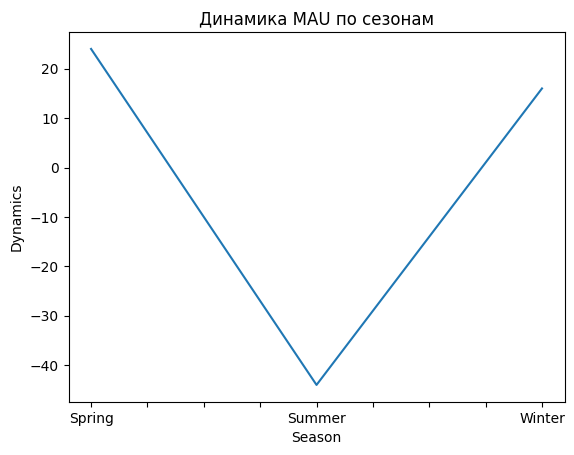

In [32]:
mau['MAU Change'].plot(kind='line',ylabel = 'Dynamics', title = "Динамика MAU по сезонам")

<h2>Самая популярная буква в названии одежды</h2>

In [33]:
def mostPopularLetinItem (df:pd.DataFrame,feature:str) -> str:
    d_let = {chr(l_i):0 for l_i in range(ord('a'), ord('z')+1)}

    def plusLet(word:str):
        for let in word:
            try:
                d_let[let.lower()]+=1
            except:
                pass
        return word

    df[feature].apply(plusLet)
    return max(d_let, key = d_let.get)
mostPopularLetinItem(df, 'Item Purchased')

's'

<h1>Задание 3</h1> 

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Давайте представим эти данные в виде df, где же люди пьют больше вина, пива и других спиртных напитков.

In [34]:
dfAlc = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
dfAlc

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [35]:
def printCountryMaxFeature(feature:str):
    maxFeatureValue = dfAlc[feature].max()
    return f"max {feature} value = {maxFeatureValue} Country - {list(dfAlc[dfAlc[feature] == maxFeatureValue]['country'])}"

In [36]:
printCountryMaxFeature('beer_servings')

"max beer_servings value = 376 Country - ['Namibia']"

In [37]:
printCountryMaxFeature('spirit_servings')

"max spirit_servings value = 438 Country - ['Grenada']"

In [38]:
printCountryMaxFeature('wine_servings')

"max wine_servings value = 370 Country - ['France']"

In [39]:
printCountryMaxFeature('total_litres_of_pure_alcohol')

"max total_litres_of_pure_alcohol value = 14.4 Country - ['Belarus']"

<h1>Задание 4</h1> 

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде df и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

In [40]:
dFTarantino = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/tarantino/tarantino.csv')
dFTarantino

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


In [41]:
dfGroupMovieType = dFTarantino.groupby(['movie','type'])['word'].agg(lambda x: len(x)).unstack(fill_value=0)

In [42]:
dfGroupMovieType['d/w'] = dfGroupMovieType['death']/dfGroupMovieType['word']
dfGroupMovieType

type,death,word,d/w
movie,,,
Django Unchained,47,262,0.179389
Inglorious Basterds,48,58,0.827586
Jackie Brown,4,368,0.010870
Kill Bill: Vol. 1,63,57,1.105263
Kill Bill: Vol. 2,11,69,0.159420
Pulp Fiction,7,469,0.014925
Reservoir Dogs,10,421,0.023753


In [43]:
dFWords =  dFTarantino['word'].value_counts().apply(lambda x: x/len(dFTarantino['word'].dropna()))
dFWords

word
fucking          0.238850
shit             0.129695
fuck             0.125000
n-word           0.105047
ass              0.082160
goddamn          0.066315
motherfucker     0.041080
bitch            0.037559
hell             0.026408
damn             0.021714
motherfucking    0.015845
fucked           0.014671
bullshit         0.008803
motherfuckers    0.008803
dick             0.008216
pussy            0.006455
asshole          0.005869
bastard          0.005869
bitches          0.005282
fucker           0.004695
assholes         0.002934
negro            0.002934
dicks            0.002934
asses            0.002347
shitty           0.002347
damned           0.001761
fucks            0.001761
shithead         0.001761
horseshit        0.001174
gooks            0.001174
japs             0.001174
cunt             0.001174
shitload         0.001174
cocksucker       0.001174
wetback          0.001174
fuckers          0.000587
horeshit         0.000587
jap              0.000587
shittie

<Axes: title={'center': 'Распределение времени между проклятиями'}, xlabel='time', ylabel='Frequency'>

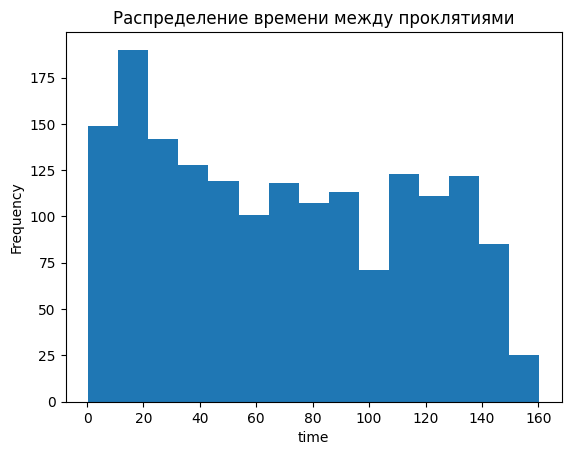

In [44]:
dFTarantino[dFTarantino['type'] == 'word']['minutes_in'].plot.hist(bins=15, xlabel ='time',title='Распределение времени между проклятиями')